In [1]:
import numpy as np
import glob
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.filters import sobel
from sklearn.model_selection import train_test_split

SIZE = 128

In [2]:
data_img = []
data_label = [] 
for dir_path in glob.glob("flowers/*"):
    label = dir_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
#         print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        data_img.append(img)
        data_label.append(label)
        
data_img = np.array(data_img)
data_label = np.array(data_label)

dandelion
daisy
tulip
rose
sunflower


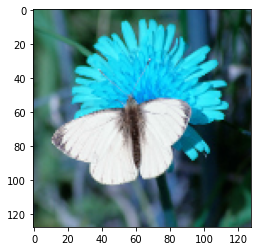

In [3]:
plt.imshow(data_img[0])

In [4]:
data_flat_img = []
for img in data_img:
    flat_img = img.flatten()
    data_flat_img.append(flat_img)

data_flat_img = np.array(data_flat_img)
data_flat_img = data_flat_img/255.

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_label)
data_encoded = le.transform(data_label)

x_train, x_test, y_train, y_test = train_test_split(data_flat_img, data_encoded, test_size=0.2)

In [6]:
len(x_train)

400

In [7]:
from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(x_train, y_train)

SVC(decision_function_shape='ovo')

In [8]:
test_prediction = SVM_model.predict(x_test)

# test_prediction = le.inverse_transform(test_prediction)

In [9]:
test_prediction

array([2, 4, 1, 4, 0, 1, 1, 1, 1, 1, 4, 0, 1, 0, 3, 0, 3, 0, 4, 3, 2, 3,
       3, 0, 3, 3, 4, 0, 3, 0, 3, 1, 0, 3, 0, 0, 3, 1, 0, 0, 1, 3, 3, 4,
       0, 2, 4, 4, 2, 1, 3, 3, 3, 2, 4, 4, 3, 3, 4, 4, 1, 3, 0, 1, 4, 1,
       3, 3, 2, 1, 0, 1, 3, 4, 4, 4, 3, 2, 2, 3, 0, 4, 0, 1, 1, 3, 1, 2,
       1, 3, 0, 0, 3, 1, 1, 1, 3, 0, 4, 4])

In [10]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction))

Accuracy =  0.51


<AxesSubplot:>

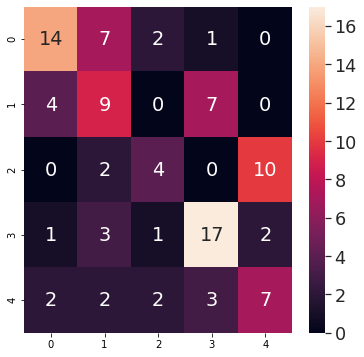

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)
